<a href="https://colab.research.google.com/github/hnmelo/MujeresDigitales/blob/main/Taller_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigando los accidentes de tránsito en Nueva York

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introducción

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las vías de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como comuna, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema empresarial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV que contiene detalles sobre cada accidente como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

*    Leer, transformar y preparar datos para su visualización
*    Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1.    ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2.   Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3.    ¿Hay más accidentes entre semana que los fines de semana?
4.    ¿Cuál es la proporción de accidentes por área por comuna? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5.    Para cada comuna, ¿durante qué horas es más probable que ocurran accidentes?
6.    ¿Cuáles son las 5 principales causas de accidentes en la ciudad?

In [83]:
# Use la siguiente informacipón de cada comuna ("borough") para realizar los análisis

borough_data = {'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}

Tenemos las siguientes columnas

     Borough: el comuna en el que ocurrió el accidente.
     COLLISION_ID: un identificador único para esta colisión
     CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): Motivos del accidente
     CROSS STREET : Calle transversal más cercana al lugar de los accidentes
     DATE: Fecha del accidente
     TIME: Hora del accidente
     DATETIME: la columna que creamos anteriormente con la combinación de fecha y hora
     LATITUDE: Latitud del accidente
     LONGITUDE: Longitud del accidente
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) INJURED: Lesión por categoría
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) KILLED: Categoría muerte sabia
     ON STREET NAME: Calle donde ocurrió el accidente
     TOTAL INJURED: Total de heridos por el accidente
     TOTAL KILLED: Total de bajas en el accidente
     VEHICLE TYPE CODE (1, 2, 3, 4, 5): Tipos de vehículos involucrados en el accidente
     ZIP CODE: código postal del lugar del accidente

Primero cargue los datos del csv a un dataframe.

**Nota:** El archivo se encuentra separado por punto y coma ( ; ) en lugar de coma ( , ), así que se debe ingresar el parámetro sep para leer el archivo. Aquí puede encontrar información:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

In [100]:
# Escriba su código aquí
df = pd.read_csv('accidents_sample.csv', sep=';')
df.head(2)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,05/29/2019,8:19,QUEENS,11368.0,40.75106,-73.86954,NaN,0,0,0,0,0,0,Other Vehicular,Unspecified,NaN,NaN,NaN,4141862,Sedan,NaN,NaN,NaN,NaN
1,05/11/2018,16:30,QUEENS,11357.0,40.78848,-73.81369,NaN,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3899223,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


## Parte 1: Accidentes a lo largo del tiempo

Agrupe los datos disponibles mensualmente y genere una gráfica lineal de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

In [101]:
df['date_format'] = pd.to_datetime(df['DATE'])
df['ano-mes'] = df['date_format'].dt.to_period('M')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

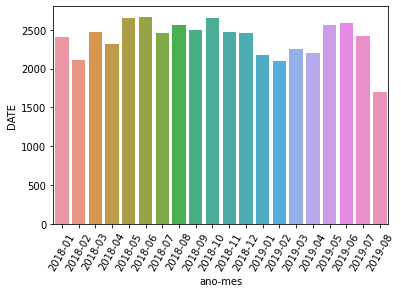

In [102]:
group = df.groupby('ano-mes').count()
sns.barplot(data=group, y='DATE', x= group.index)
plt.xticks(rotation = 60)

**Como podemos observar en la gráfica, es muy variable el numero de accidentes, no han disminuido y se mantiene una "Secuencia" o los valores son similares en los meses, ejemplo: Se nota un patrón en común en los mese 05 del 2018 y los del 2019, lo mismo en el mes 01 y 02 del 2018 y 2019, entonces se podría indagar o estudiar más los datos para ver qué factor(es) influye en aquellos meses (clima)**


## Parte 2: Puntos calientes de accidentes en un día

¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna HORA basada en los datos de la columna DATETIME, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

In [103]:
df = df.sort_values(by = 'date_format') 
df.head(2)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,date_format,ano-mes
42849,01/01/2018,4:12,MANHATTAN,10035.0,40.797940,-73.93711,NaN,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3820534,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,2018-01-01,2018-01
10729,01/01/2018,13:45,QUEENS,11355.0,40.756355,-73.82578,MAPLE AVENUE,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3820763,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2018-01-01,2018-01


In [107]:
df.drop(['DATE'], axis=1)

,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,ano-mes
42849,4:12,MANHATTAN,10035.0,40.797940,-73.937110,NaN,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3820534,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,2018-01
10729,13:45,QUEENS,11355.0,40.756355,-73.825780,MAPLE AVENUE,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3820763,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2018-01
23863,4:35,BRONX,10453.0,40.848328,-73.918420,BRANDT PLACE,0,0,0,0,0,0,Other Vehicular,Driver Inattention/Distraction,NaN,NaN,NaN,3820784,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,2018-01
43669,2:58,STATEN ISLAND,10304.0,40.621983,-74.082530,NaN,0,0,0,0,0,0,Driver Inexperience,Driver Inexperience,Unspecified,NaN,NaN,3820894,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,2018-01
14850,9:30,MANHATTAN,10001.0,40.750828,-74.001890,WEST 28 STREET,0,0,0,0,0,0,Pavement Slippery,Unspecified,NaN,NaN,NaN,3821971,SPORT UTILITY / STATION WAGON,TAXI,NaN,NaN,NaN,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13821,23:15,BRONX,10453.0,40.854874,-73.916794,SEDGWICK AVENUE,0,0,0,0,0,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,4194013,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019-08
36608,22:00,BRONX,10466.0,40.892925,-73.836070,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4194653,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2019-08
2879,23:15,MANHATTAN,10025.0,40.794052,-73.970375,WEST 96 STREET,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4194623,Sedan,Taxi,NaN,NaN,NaN,2019-08
39542,10:59,BRONX,10469.0,40.873642,-73.853180,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4194663,Sedan,NaN,NaN,NaN,NaN,2019-08


In [108]:
df.rename(columns={'date_format':'FECHA'} ,inplace=True)
df


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATE,ano-mes
42849,01/01/2018,4:12,MANHATTAN,10035.0,40.797940,-73.937110,NaN,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3820534,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,2018-01-01,2018-01
10729,01/01/2018,13:45,QUEENS,11355.0,40.756355,-73.825780,MAPLE AVENUE,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3820763,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2018-01-01,2018-01
23863,01/01/2018,4:35,BRONX,10453.0,40.848328,-73.918420,BRANDT PLACE,0,0,0,0,0,0,Other Vehicular,Driver Inattention/Distraction,NaN,NaN,NaN,3820784,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,2018-01-01,2018-01
43669,01/01/2018,2:58,STATEN ISLAND,10304.0,40.621983,-74.082530,NaN,0,0,0,0,0,0,Driver Inexperience,Driver Inexperience,Unspecified,NaN,NaN,3820894,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,2018-01-01,2018-01
14850,01/01/2018,9:30,MANHATTAN,10001.0,40.750828,-74.001890,WEST 28 STREET,0,0,0,0,0,0,Pavement Slippery,Unspecified,NaN,NaN,NaN,3821971,SPORT UTILITY / STATION WAGON,TAXI,NaN,NaN,NaN,2018-01-01,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13821,08/24/2019,23:15,BRONX,10453.0,40.854874,-73.916794,SEDGWICK AVENUE,0,0,0,0,0,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,4194013,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019-08-24,2019-08
36608,08/24/2019,22:00,BRONX,10466.0,40.892925,-73.836070,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4194653,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2019-08-24,2019-08
2879,08/24/2019,23:15,MANHATTAN,10025.0,40.794052,-73.970375,WEST 96 STREET,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4194623,Sedan,Taxi,NaN,NaN,NaN,2019-08-24,2019-08
39542,08/24/2019,10:59,BRONX,10469.0,40.873642,-73.853180,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4194663,Sedan,NaN,NaN,NaN,NaN,2019-08-24,2019-08


## Parte 3: Accidentes por día laborable

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

In [ ]:
# Escriba su código aquí


## Parte 4: Análisis de comuna

Trace un gráfico de barras del número total de accidentes en cada comuna, así como uno de los accidentes por kilómetro cuadrado por comuna. ¿Qué puedes concluir?

In [ ]:
# Escriba su código aquí


## Parte 5: Análisis por hora del comuna

¿Qué horas tienen más accidentes en cada comuna? Trace un gráfico de barras para cada comuna que muestre el número de accidentes por cada hora del día.

In [ ]:
# Escriba su código aquí


## Parte 6: Causa de accidentes

¿Qué factores provocan la mayoría de los accidentes?

In [ ]:
# Escriba su código aquí
